# IRIS FLOWER CLASSIFICATION

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from here for the task of iris flower classification with Machine Learning.

# Step 1: Load the Dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add the target variable
df['species'] = iris.target

# Display the first few rows of the DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Step 2: Exploratory Data Analysis (EDA)

Let's explore the dataset to understand its structure and relationships.

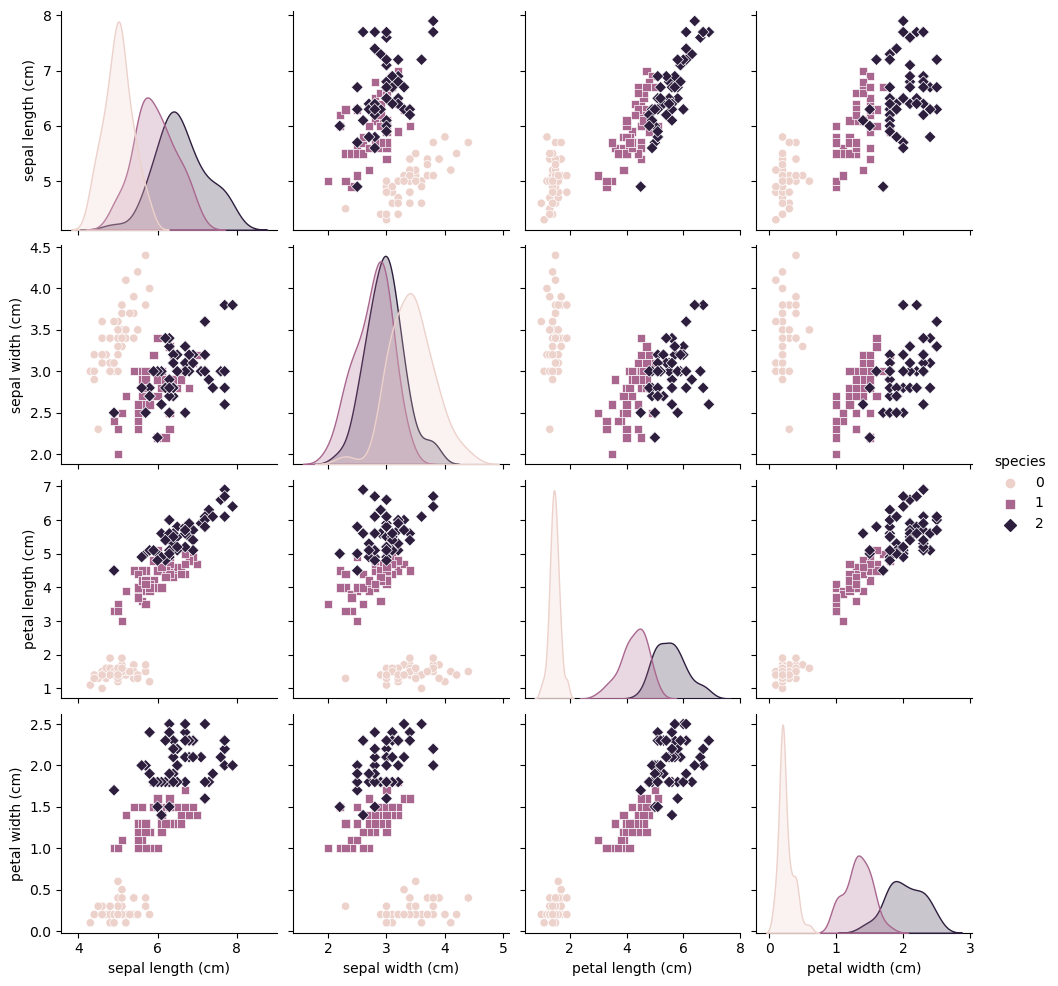

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

# Summary statistics
df.describe()


# Step 3: Data Preprocessing

We'll split the data into training and test sets to evaluate the model's performance.

In [3]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop(columns='species')
y = df['species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Model Training

We'll use a simple machine learning model, such as a Support Vector Machine (SVM), to classify the iris species.

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)


SVC(kernel='linear')

# Step 5: Model Evaluation

We'll evaluate the model's performance on the test data.

In [5]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Step 6: Model Tuning (Optional)

We can tune the model's hyperparameters to improve its performance. For example, we can use grid search to find the best hyperparameters for the SVM model.

In [6]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Initialize the grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.9583333333333334
